# Global Usage of Internet - The new necessity! 

#### Understanding the Context

Most of the Filipinos consider that having access to reliable internet is essential. Furthermore, this desire for networking is not a recent one. Approximately 68% to 72% of Filipinos have access to internet considers that having access to fast internet was crucial even before the pandemic started more than two years ago. A high-speed internet connection at home is something that Filipino people are concerned about being able to afford. This thought is not pertained to Philippines alone but the entire world today.
 
Now Lets use some data inorder to analyze and depict some global trends in Internet usage! 

#### Objectives
This report aims to help bring major insights on Internet usage and subscriptions trends, out from the provided data over the period of time. Our major analysis objectives are:

1) Top 5 Countries with highest population share in internet usage and 
    the number of people in those countries using internet in 2019.
2) Top 5 Countries in each region all over the world with highest internet usage, 
    and how these regions are progressing in over the time in terms of Internet.
3) Top 5 Countries with most number of Internet users.
4) How Internet usage is correlated with broadband subscriptions.
 

### Data - Lets have a glance into the datasets we are using for this analysis

We have 3 datasets which provide insights on Internet usage over different countries/regions. 

-"internet" - Provides us information detailing about the percentage of population using the internet in a region or Country over a period of time(years).

-"people" - Provides us insights on the number of people using the internet in a region or Country over a period of time(years).

-"broadband" - Provides us particulars on the number of subscriptions to high-speed(>=256kbits/s) internet in a region or Country over a period of time(years).



Now we shall load the datasets into pandas data frames and start our analysis. Lets dive in! 

### Loading Data Sets into Pandas DataFrames 

In [67]:
# Import pandas
import pandas as pd

# Read the data
internet = pd.read_csv('data/internet.csv')
people = pd.read_csv('data/people.csv')
broadband = pd.read_csv('data/broadband.csv')

# Take a look at the first rows
print("internet Table")
display(internet.head()) # DataFrame.head(n) function used to return first n records of the dataframe, default n=5
print("people")
display(people.head())
print("broadband Table")
display(broadband.head())

internet Table


,Entity,Code,Year,Internet_Usage
0,Afghanistan,AFG,1990,0.0
1,Afghanistan,AFG,1991,0.0
2,Afghanistan,AFG,1992,0.0
3,Afghanistan,AFG,1993,0.0
4,Afghanistan,AFG,1994,0.0


people


,Entity,Code,Year,Users
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,1991,0
2,Afghanistan,AFG,1992,0
3,Afghanistan,AFG,1993,0
4,Afghanistan,AFG,1994,0


broadband Table


,Entity,Code,Year,Broadband_Subscriptions
0,Afghanistan,AFG,2004,0.000809
1,Afghanistan,AFG,2005,0.000858
2,Afghanistan,AFG,2006,0.001892
3,Afghanistan,AFG,2007,0.001845
4,Afghanistan,AFG,2008,0.001804


Let us look into our datasets for any null values and see if there is any need to do preprocessing of the data! Look for duplicates and nulls..

In [68]:
#internet
display(internet[internet.isnull().any(axis=1)]) #Finds all the rows with null values
print(internet.duplicated().any()) # Finds if there are any duplicates in the data

#people
display(people[people.isnull().any(axis=1)]) #Finds all the rows with null values
print(people.duplicated().any()) # Finds if there are any duplicates in the data

#broadband
display(broadband[broadband.isnull().any(axis=1)]) #Finds all the rows with null values
print(broadband.duplicated().any()) # Finds if there are any duplicates in the data

,Entity,Code,Year,Internet_Usage
22,Africa Eastern and Southern,NaN,1990,0.000000
23,Africa Eastern and Southern,NaN,1991,0.001599
24,Africa Eastern and Southern,NaN,1992,0.004664
25,Africa Eastern and Southern,NaN,1993,0.013609
26,Africa Eastern and Southern,NaN,1994,0.029658
...,...,...,...,...
6827,Upper middle income,NaN,2013,46.783103
6828,Upper middle income,NaN,2014,49.389453
6829,Upper middle income,NaN,2015,53.161580
6830,Upper middle income,NaN,2016,55.786069


False


,Entity,Code,Year,Users
26,Africa,NaN,1990,0
27,Africa,NaN,1991,5434
28,Africa,NaN,1992,16232
29,Africa,NaN,1993,48970
30,Africa,NaN,1994,112387
...,...,...,...,...
6104,Upper-middle-income countries,NaN,2016,1387883616
6105,Upper-middle-income countries,NaN,2017,1463645733
6106,Upper-middle-income countries,NaN,2018,1577537079
6107,Upper-middle-income countries,NaN,2019,1689000449


False


,Entity,Code,Year,Broadband_Subscriptions
944,East Asia and Pacific,NaN,2000,0.321039
945,East Asia and Pacific,NaN,2001,0.739900
946,East Asia and Pacific,NaN,2002,1.372659
947,East Asia and Pacific,NaN,2003,2.097008
948,East Asia and Pacific,NaN,2004,3.109128
...,...,...,...,...
3715,Upper middle income,NaN,2016,18.528900
3716,Upper middle income,NaN,2017,21.638605
3717,Upper middle income,NaN,2018,22.654459
3718,Upper middle income,NaN,2019,24.197001


False


If we clearly look the datasets above with null values, the field "Code" has null value for all the region (which is group of Countries in a particular region) based "Entities", and there are no duplicates in our dataset for all the 3 datasets as the duplicated().any() is "False". We are now good to use our datasets for our analysis.

# Top 5 countries with the highest internet use (by population share)

If we look at the internet table, the "Entity" attribute also includes region or group,and it is associated with a attribute "Code" uniquely, so filter the dataframe with not null "Code" values and sort values based on "Internet_Usage" field in descending order. 

In [69]:
#lets filter the dataframe with notnull and then sort the values on "Internet_Usage" column
#ascending ="False" sorts the data in descending order
Top5_Internet_Using_Countries=internet[internet["Code"].notnull()].sort_values(
    by="Internet_Usage",ascending=False)

Top5_Internet_Using_Countries

,Entity,Code,Year,Internet_Usage
470,Bahrain,BHR,2019,99.701504
5387,Qatar,QAT,2018,99.652849
5388,Qatar,QAT,2019,99.652804
3415,Kuwait,KWT,2018,99.598850
3767,Liechtenstein,LIE,2017,99.546612
...,...,...,...,...
4227,Micronesia (country),FSM,1993,0.000000
4226,Micronesia (country),FSM,1992,0.000000
4225,Micronesia (country),FSM,1991,0.000000
4224,Micronesia (country),FSM,1990,0.000000


To eliminate the repeating country names and get the top 5 unique countries, lets drop duplicates based on entity field. 

Note: Here duplicate indicates recurring "Entity" through "Year"

In [70]:
Top5_Internet_Using_Countries=Top5_Internet_Using_Countries.drop_duplicates("Entity").head(5)
Top5_Internet_Using_Countries
#Dropping duplicates based on "Entity" will help us identify the top 5 unique countires.

,Entity,Code,Year,Internet_Usage
470,Bahrain,BHR,2019,99.701504
5387,Qatar,QAT,2018,99.652849
3415,Kuwait,KWT,2018,99.598850
3767,Liechtenstein,LIE,2017,99.546612
6716,United Arab Emirates,ARE,2019,99.149998


In [71]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,Entity,Code,Year,Internet_Usage
470,Bahrain,BHR,2019,99.701504
5387,Qatar,QAT,2018,99.652849
3415,Kuwait,KWT,2018,99.598850
3767,Liechtenstein,LIE,2017,99.546612
6716,United Arab Emirates,ARE,2019,99.149998


The top 5 countries with highest internet use by population share are : Bohrain, Watar, Kuwait, Liechtenstein and United Arab Emirates. 

# Number of people who had internet access in those countries in 2019

To achieve this, we need to use "people" dataframe and filter the data using "Entity" attribute in "Top5_Internet_Using_Countries" dataframe in the year 2019.  
.isin() function helps us filter the data, we are looking for.

In [72]:
#For this we will need "people" dataframe
#Frist let us filter the records from people table by applying .isin() function 
#Then lets display data by using filter for year i.e. 2019
Number_of_users_2019 =people[(people["Entity"].isin(Top5_Internet_Using_Countries["Entity"]))&(people["Year"]==2019)]
Number_of_users_2019


,Entity,Code,Year,Users
477,Bahrain,BHR,2019,1489735
3091,Kuwait,KWT,2019,4420795
4728,Qatar,QAT,2019,2797495
5986,United Arab Emirates,ARE,2019,9133361


In [73]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,Entity,Code,Year,Users
477,Bahrain,BHR,2019,1489735
3091,Kuwait,KWT,2019,4420795
4728,Qatar,QAT,2019,2797495
5986,United Arab Emirates,ARE,2019,9133361


You might be wondering why data about "Liechtenstein" is not in the above reports, i.e. because we don't have data of the number of population using internet in "Liechtenstein" in 2019! 
You can verify this by : 

people[(people["Entity"] == "Liechtenstein")].sort_values(by="Year",ascending=False)

In [74]:
#people[(people["Entity"] == "Liechtenstein")].sort_values(by="Year",ascending=False)

# Top countries with the highest internet using countries in different regions


We need to know which country falls under which region, please look into the referred link below, to identify this. Lets create a list of countries for each region using Python lists.

Ref: https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups

In [75]:
#Lets create a list of countries in different regions using the following link
#https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups

#Middle East and North America
Countries_MiddleEastandNorthAmerica = ["Algeria","Jordan","Qatar","Bahrain" ,"Kuwait","Saudi Arabia","Djibouti","Lebanon","Syrian Arab Republic","Egypt, Arab Rep.","Libya","Tunisia","Iran Islamic Rep.","Malta","United Arab Emirates","Iraq","Morocco	West Bank and Gaza","Israel","Oman","Yemen, Rep."]

#Latin America & Caribbean
Countries_LatinAmericaCaribbean = ['Antigua and Barbuda','Curacao','Paraguay','Argentina','Dominica','Peru'',Aruba','Dominican Republic','Puerto Rico', 'Bahamas, The','Ecuador','Sint Maarten (Dutch part)','Barbados','El Salvador','St. Kitts and Nevis', 'Belize','Grenada','St. Lucia','Bolivia','Guatemala','St. Martin (French part)','Brazil','Guyana','St. Vincent and the Grenadines','British Virgin Islands','Haiti','Suriname','Cayman Islands','Honduras','Trinidad and Tobago','Chile','Jamaica','Turks and Caicos Islands','Colombia','Mexico','Uruguay','Costa Rica', 'Nicaragua','Venezuela, RB','Cuba','Panama',"Virgin Islands (U.S.)"]

#East Asia & Pacific
Countries_EastAsiaPacific = ['American Samoa','Korea, Rep.','Philippines','Australia','Lao PDR', 'Samoa', 'Brunei Darussalam','Macao SAR, China','Singapore','Cambodia','Malaysia','Solomon Islands', 'China','Marshall Islands','Taiwan, China','Fiji','Micronesia, Fed. Sts.','Thailand','French Polynesia','Mongolia','Timor-Leste','Guam','Myanmar','Papua New Guinea','Hong Kong SAR, China', 'Nauru', 'Tonga','Indonesia','New Caledonia','Tuvalu','Japan','New Zealand', 'Vanuatu', 'Kiribati', 'Northern Mariana Islands','Vietnam',"Korea, Dem. People's Rep.",'Palau']

#South Asia
Countries_SouthAsia=['Afghanistan','India','Pakistan','Bangladesh','Maldives','Sri Lanka','Bhutan','Nepal']

#North America
Countries_NorthAmerica =['Bermuda','Canada','United States']

#Europe and Central Asia
Countries_EuropeCentralAsia =['Albania','Gibraltar','Norway','Andorra','Greece','Poland','Armenia','Greenland','Portugal','Austria','Hungary','Romania','Azerbaijan','Iceland','Russian Federation','Belarus','Ireland','San Marino','Belgium',
'Isle of Man','Serbia','Bosnia and Herzegovina','Italy','Slovak Republic', 'Bulgaria', 'Kazakhstan', 'Slovenia', 'Channel Islands','Kosovo','Spain','Croatia','Kyrgyz Republic','Sweden','Cyprus','Latvia', 'Switzerland','Czech Republic', 'Liechtenstein','Tajikistan','Denmark',	'Lithuania','Türkiye','Estonia'	,'Luxembourg','Turkmenistan','Faroe Islands','Moldova','Ukraine','Finland',	'Monaco','United Kingdom'
'France','Montenegro','Uzbekistan', 'Georgia','Netherlands'	,'Germany'	'North Macedonia'	]

Now lets us use these lists in filtering the countries of a particular region and sort the values in descending order and print top 5 unique values!

#### Middle East & North Africa

In [76]:
ME_NA=internet[(internet["Entity"].isin(Countries_MiddleEastandNorthAmerica))].sort_values(by="Internet_Usage",ascending=False).drop_duplicates("Entity").head()
ME_NA

,Entity,Code,Year,Internet_Usage
470,Bahrain,BHR,2019,99.701504
5387,Qatar,QAT,2018,99.652849
3415,Kuwait,KWT,2018,99.598850
6716,United Arab Emirates,ARE,2019,99.149998
5661,Saudi Arabia,SAU,2019,95.724736


In [77]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,Entity,Code,Year,Internet_Usage
470,Bahrain,BHR,2019,99.701504
5387,Qatar,QAT,2018,99.652849
3415,Kuwait,KWT,2018,99.598850
6716,United Arab Emirates,ARE,2019,99.149998
5661,Saudi Arabia,SAU,2019,95.724736


#### Latin America & Caribbean

In [78]:
LA_C=internet[(internet["Entity"].isin(Countries_LatinAmericaCaribbean))].sort_values(by="Internet_Usage",ascending=False).drop_duplicates("Entity").head()
LA_C


,Entity,Code,Year,Internet_Usage
1200,Chile,CHL,2016,83.558586
524,Barbados,BRB,2017,81.760778
1344,Costa Rica,CRI,2019,81.202596
1088,Cayman Islands,CYM,2017,81.067693
816,British Virgin Islands,VGB,2017,77.704268


In [79]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,Entity,Code,Year,Internet_Usage
1200,Chile,CHL,2016,83.558586
524,Barbados,BRB,2017,81.760778
1344,Costa Rica,CRI,2019,81.202596
1088,Cayman Islands,CYM,2017,81.067693
816,British Virgin Islands,VGB,2017,77.704268


#### East Asia and Pacific

In [80]:
EA_P=internet[(internet["Entity"].isin(Countries_EastAsiaPacific))].sort_values(by="Internet_Usage",ascending=False).drop_duplicates("Entity").head()
EA_P


,Entity,Code,Year,Internet_Usage
3269,Japan,JPN,2016,93.182721
4692,New Zealand,NZL,2017,90.811093
5790,Singapore,SGP,2019,88.949253
355,Australia,AUS,2017,86.545049
4024,Malaysia,MYS,2019,84.213224


In [81]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,Entity,Code,Year,Internet_Usage
3269,Japan,JPN,2016,93.182721
4692,New Zealand,NZL,2017,90.811093
5790,Singapore,SGP,2019,88.949253
355,Australia,AUS,2017,86.545049
4024,Malaysia,MYS,2019,84.213224


#### South Asia

In [82]:

SA=internet[(internet["Entity"].isin(Countries_SouthAsia))].sort_values(by="Internet_Usage",ascending=False).drop_duplicates("Entity").head()
SA


,Entity,Code,Year,Internet_Usage
4052,Maldives,MDV,2017,63.185666
687,Bhutan,BTN,2016,41.772645
6110,Sri Lanka,LKA,2017,34.113348
3044,India,IND,2017,32.000000
4607,Nepal,NPL,2017,21.403510


In [83]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,Entity,Code,Year,Internet_Usage
4052,Maldives,MDV,2017,63.185666
687,Bhutan,BTN,2016,41.772645
6110,Sri Lanka,LKA,2017,34.113348
3044,India,IND,2017,32.000000
4607,Nepal,NPL,2017,21.403510


#### Europe & Central Asia

In [84]:

E_CA=internet[(internet["Entity"].isin(Countries_EuropeCentralAsia))].sort_values(by="Internet_Usage",ascending=False).drop_duplicates("Entity").head()
E_CA

,Entity,Code,Year,Internet_Usage
3767,Liechtenstein,LIE,2017,99.546612
3016,Iceland,ISL,2018,99.010954
3908,Luxembourg,LUX,2016,98.136699
1552,Denmark,DNK,2019,98.046435
4891,Norway,NOR,2019,98.000004


In [85]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,Entity,Code,Year,Internet_Usage
3767,Liechtenstein,LIE,2017,99.546612
3016,Iceland,ISL,2018,99.010954
3908,Luxembourg,LUX,2016,98.136699
1552,Denmark,DNK,2019,98.046435
4891,Norway,NOR,2019,98.000004


#### North America

In [86]:

NA=internet[(internet["Entity"].isin(Countries_NorthAmerica))].sort_values(by="Internet_Usage",ascending=False).drop_duplicates("Entity").head()
NA

#NA has only 3 Countries

,Entity,Code,Year,Internet_Usage
663,Bermuda,BMU,2017,98.370000
1014,Canada,CAN,2017,92.701372
6775,United States,USA,2018,88.498903


In [87]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,Entity,Code,Year,Internet_Usage
663,Bermuda,BMU,2017,98.370000
1014,Canada,CAN,2017,92.701372
6775,United States,USA,2018,88.498903


# Now lets visualize usage of internet in different regions over time 

Now lets put all the records of these regions into "regional_data" dataframe. Lets plot a chart, with "Year" on x-axis, "Internet_Usage" on Y axis grouped by "Entity".

In [88]:
#Make a list of regions from internet table
selection = ['European Union','Middle East & North Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'Europe & Central Asia']
regional_data = internet[internet["Entity"].isin(selection)]
regional_data


,Entity,Code,Year,Internet_Usage
1665,East Asia & Pacific,NaN,1990,0.007211
1666,East Asia & Pacific,NaN,1991,0.014868
1667,East Asia & Pacific,NaN,1992,0.031198
1668,East Asia & Pacific,NaN,1993,0.062184
1669,East Asia & Pacific,NaN,1994,0.107777
...,...,...,...,...
5985,South Asia,NaN,2013,13.760619
5986,South Asia,NaN,2014,19.059302
5987,South Asia,NaN,2015,16.223473
5988,South Asia,NaN,2016,20.424139


#### Lets create or plot for the above dataframe using datacamp 

'Create Chart' option grouping by "Entity" i.e. region, and "Year","Internet_Usage" on X and Y axes respectively. 



In [89]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,Entity,Code,Year,Internet_Usage
1665,East Asia & Pacific,NaN,1990,0.007211
1666,East Asia & Pacific,NaN,1991,0.014868
1667,East Asia & Pacific,NaN,1992,0.031198
1668,East Asia & Pacific,NaN,1993,0.062184
1669,East Asia & Pacific,NaN,1994,0.107777
...,...,...,...,...
5985,South Asia,NaN,2013,13.760619
5986,South Asia,NaN,2014,19.059302
5987,South Asia,NaN,2015,16.223473
5988,South Asia,NaN,2016,20.424139


From the above chart you can depict that North America has the highest growth rate in usage of internet. Europian Union also has a great increase in internet usage over time, where as South Asia has least growth in internet usage when compared to other regions.

# Correlation between Internet Usage and Broadband Subrscriptions in 2019

Let us begin with the term correlation. Correlation is a relationship between different quantities. It is interdependence of variable quantities. Now we are going to analyze this interdepende of two quantities "Internet_Usage" and "broadband_Subscriptions". 

In [90]:
#Let us create a new dataset by joining "internet" and "broadband" as to get more accurate data and filter the data by applying year value as 2019
merged_internet_broadband = internet[internet['Year']==2019].merge(broadband[broadband['Year']==2019],how = 'inner',on=['Entity','Code','Year'])
display(merged_internet_broadband)

#Now we have all the regions "Internet_Usage" and "Broadband_Subscriptions" records in the year 2019

,Entity,Code,Year,Internet_Usage,Broadband_Subscriptions
0,Albania,ALB,2019,69.642855,15.140735
1,Austria,AUT,2019,87.752205,28.128099
2,Bahrain,BHR,2019,99.701504,8.590934
3,Belarus,BLR,2019,82.789152,34.011101
4,Belgium,BEL,2019,90.370513,39.783138
...,...,...,...,...,...
65,Turkey,TUR,2019,73.976704,17.058664
66,United Arab Emirates,ARE,2019,99.149998,31.174944
67,United Kingdom,GBR,2019,92.516629,39.792530
68,Uruguay,URY,2019,76.949552,29.245749


Lets look at the relationship between Internet_Usage and Broadband_Subscriptions with a plot.

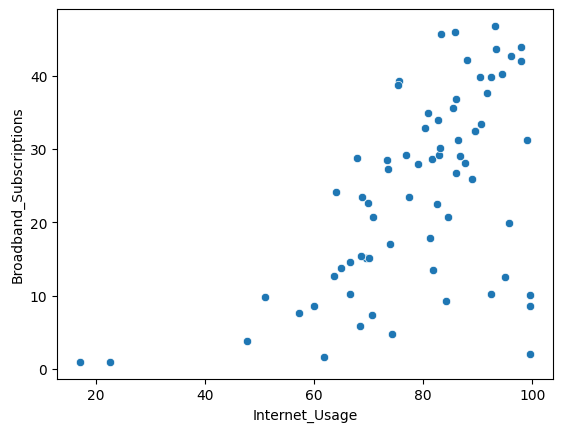

Correlation value between Users and Braodband_Subscriptions is  0.5590077105170114


In [91]:
#importing seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(merged_internet_broadband['Internet_Usage'],merged_internet_broadband['Broadband_Subscriptions'])
plt.show()
print("Correlation value between Users and Braodband_Subscriptions is ",merged_internet_broadband['Internet_Usage'].corr(merged_internet_broadband['Broadband_Subscriptions']))



From the above plot we can see the relationship between these variables is definitely linear. The correlation between Internet_Usage and Broadband_Subscriptions is about 0.56, which is a positive linear relationship.

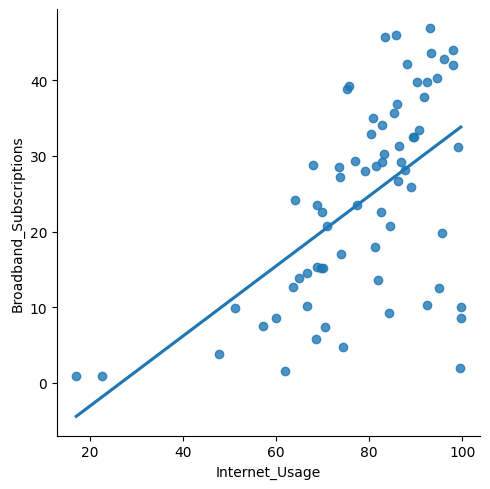

In [92]:
sns.lmplot(x='Internet_Usage',y='Broadband_Subscriptions',data=merged_internet_broadband,ci=None)
plt.show()

A correlation of 0.56 indicates,"Internet_Usage" and "Broadband_Subscriptions" are moderately associated with each other. Increase in broadband subscriptions will moderately improve Internet usage. 